# Gradient descent examples

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation

In [2]:
%matplotlib notebook

## 0. Gradient descent procedure

In [3]:
def trace_grad_descent(f, df, x0, alpha=0.01, n_iter=100):
    x = x0
    points_X = [x]
    points_Y = [f(x)]

    for _ in range(n_iter):
        x = x - alpha * df(x)
        y = f(x)
        points_X.append(x)
        points_Y.append(y)

    return points_X, points_Y

In [4]:
def animate_grad_descent(X, Y, gd_X, gd_Y, title=''):
    fig = plt.figure(figsize=(6, 4))

    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')

    plt.plot(X, Y)

    graph, = plt.plot([], [], 'or-')

    def animate(i):
        graph.set_data(gd_X[:i], gd_Y[:i])
        return graph

    ani = FuncAnimation(fig, animate, frames=len(gd_X), interval=200, repeat=True)

    plt.title(title)
    plt.show()

    return ani


def animate_grad_descent_2d(X, Y, Z, min_point, gd_X, title=''):
    fig = plt.figure(figsize=(6, 4))

    ctr = plt.contour(X, Y, Z)

    plt.grid(True, which='both')

    plt.plot(min_point[0], min_point[1], 'bx', markersize=12)

    graph, = plt.plot([], [], 'or-')

    def animate(i):
        graph.set_data(gd_X[:i, 0], gd_X[:i, 1])
        return graph

    ani = FuncAnimation(fig, animate, frames=len(gd_X), interval=200, repeat=True)

    plt.title(title)
    plt.show()

    return ani

## 1. $y=(1 - x)^2 + 2$

In [5]:
def x_squared(x):
    return (1 - x) ** 2 + 2


def dx_squared(x):
    return 2 * x - 2

In [6]:
X = np.linspace(start=-2, stop=4, num=50, endpoint=True)
Y = x_squared(X)
dY = dx_squared(X)

### 1.1. Slow convergence

<IPython.core.display.Javascript object>


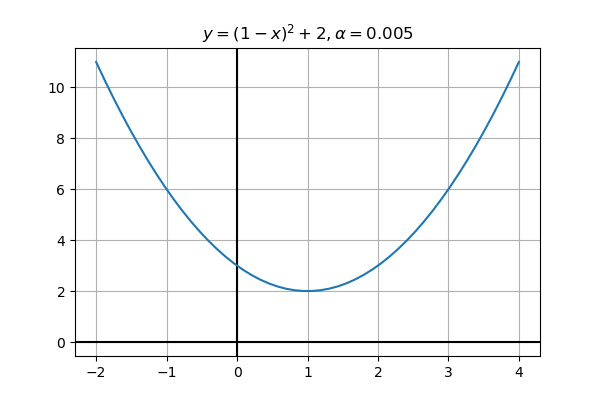

In [7]:
x0 = -2
alpha = 0.005

gd_X, gd_Y = trace_grad_descent(f=x_squared, df=dx_squared, x0=x0, alpha=alpha, n_iter=100)
ani = animate_grad_descent(X, Y, gd_X=gd_X, gd_Y=gd_Y, title='$y = (1 - x) ^ 2 + 2, \\alpha = {}$'.format(alpha))

### 1.2. Good convergence

<IPython.core.display.Javascript object>


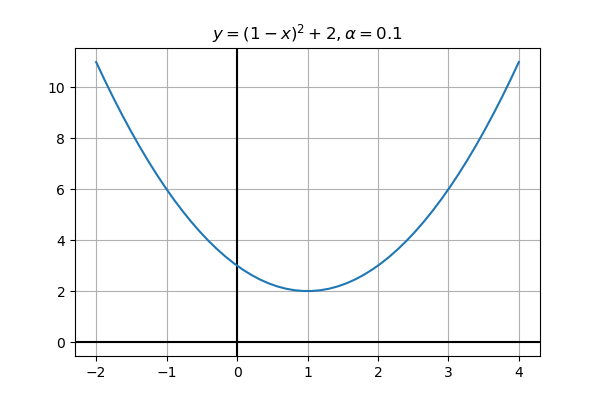

In [8]:
x0 = -2
alpha = 0.1

gd_X, gd_Y = trace_grad_descent(f=x_squared, df=dx_squared, x0=x0, alpha=alpha, n_iter=100)
ani = animate_grad_descent(X, Y, gd_X=gd_X, gd_Y=gd_Y, title='$y = (1 - x) ^ 2 + 2, \\alpha = {}$'.format(alpha))

### 1.3. Overjumping slow convergence

<IPython.core.display.Javascript object>


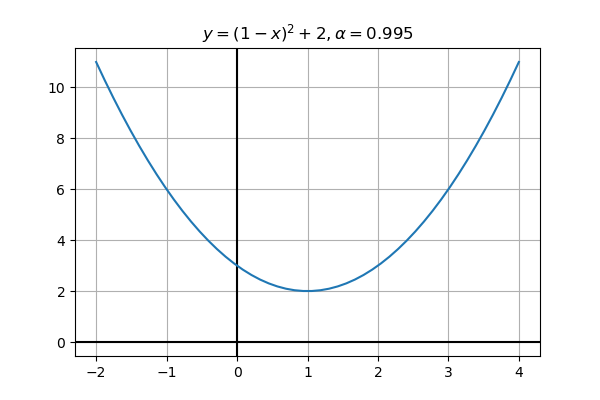

In [9]:
x0 = -2
alpha = 0.995

gd_X, gd_Y = trace_grad_descent(f=x_squared, df=dx_squared, x0=x0, alpha=alpha, n_iter=100)
ani = animate_grad_descent(X, Y, gd_X=gd_X, gd_Y=gd_Y, title='$y = (1 - x) ^ 2 + 2, \\alpha = {}$'.format(alpha))

### 1.4. Divergence

<IPython.core.display.Javascript object>


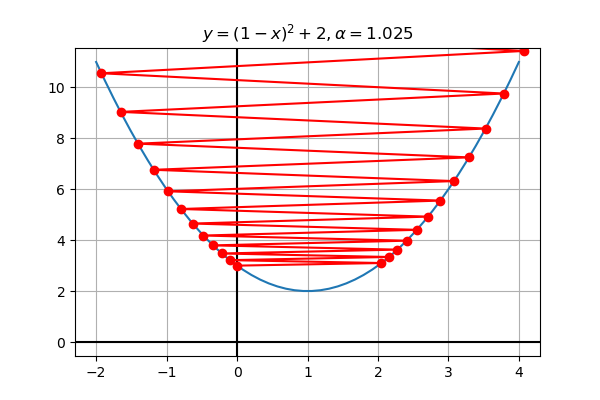

In [10]:
x0 = 0
alpha = 1.025

gd_X, gd_Y = trace_grad_descent(f=x_squared, df=dx_squared, x0=x0, alpha=alpha, n_iter=100)
ani = animate_grad_descent(X, Y, gd_X=gd_X, gd_Y=gd_Y, title='$y = (1 - x) ^ 2 + 2, \\alpha = {}$'.format(alpha))

## 2. $y = x \cdot \sin x$

In [11]:
def x_sinx(x):
    return x * np.sin(x)


def dx_sinx(x):
    return np.sin(x) + x * np.cos(x)

In [12]:
X = np.linspace(start=-2, stop=8, num=100, endpoint=True)
Y = x_sinx(X)
dY = dx_sinx(X)

### 2.1. Slow convergence

<IPython.core.display.Javascript object>


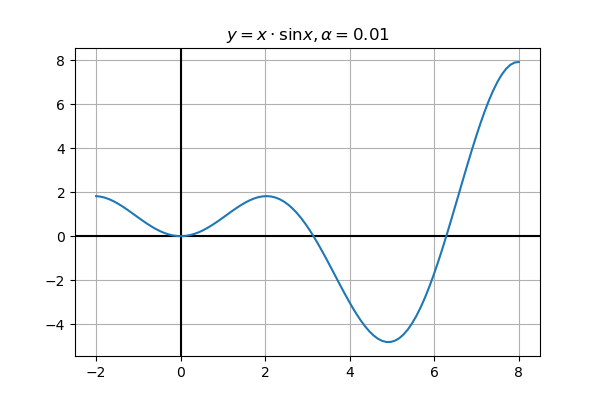

In [13]:
x0 = 2.5
alpha = 0.01

gd_X, gd_Y = trace_grad_descent(f=x_sinx, df=dx_sinx, x0=x0, alpha=alpha, n_iter=100)
animate_grad_descent(X, Y, gd_X=gd_X, gd_Y=gd_Y, title='$y = x \cdot \sin x, \\alpha = {}$'.format(alpha))

### 2.2. Good convergence

<IPython.core.display.Javascript object>


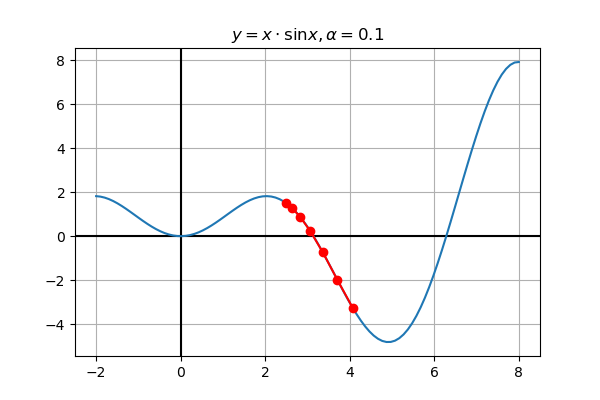

In [14]:
x0 = 2.5
alpha = 0.1

gd_X, gd_Y = trace_grad_descent(f=x_sinx, df=dx_sinx, x0=x0, alpha=alpha, n_iter=100)
animate_grad_descent(X, Y, gd_X=gd_X, gd_Y=gd_Y, title='$y = x \cdot \sin x, \\alpha = {}$'.format(alpha))

### 2.3. Overjumping divergence

<IPython.core.display.Javascript object>


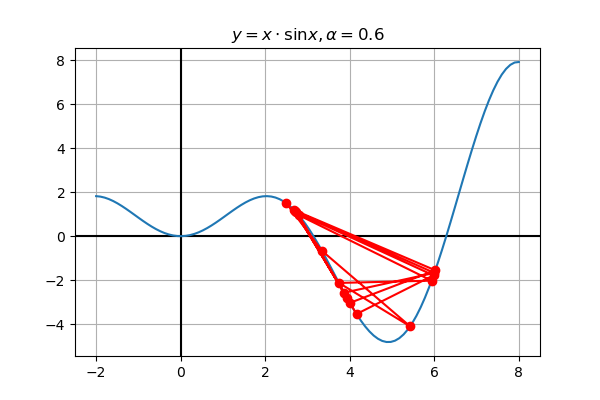

In [15]:
x0 = 2.5
alpha = 0.6

gd_X, gd_Y = trace_grad_descent(f=x_sinx, df=dx_sinx, x0=x0, alpha=alpha, n_iter=100)
animate_grad_descent(X, Y, gd_X=gd_X, gd_Y=gd_Y, title='$y = x \cdot \sin x, \\alpha = {}$'.format(alpha))

### 2.4. Convergence with jumping into another local minumum

<IPython.core.display.Javascript object>


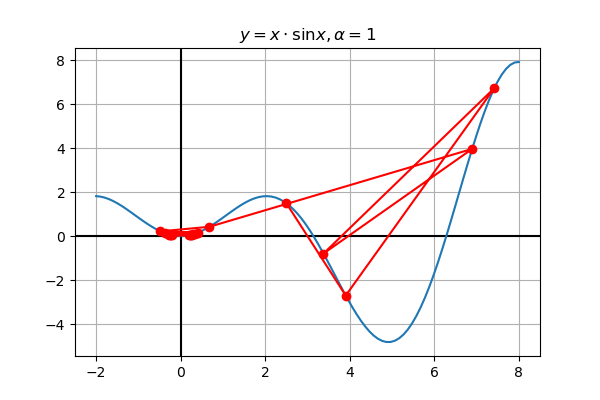

In [16]:
x0 = 2.5
alpha = 1

gd_X, gd_Y = trace_grad_descent(f=x_sinx, df=dx_sinx, x0=x0, alpha=alpha, n_iter=100)
animate_grad_descent(X, Y, gd_X=gd_X, gd_Y=gd_Y, title='$y = x \cdot \sin x, \\alpha = {}$'.format(alpha))

## 3. $z=3x^2 + y^2$

In [17]:
def z(x):
    return 3 * x[0] ** 2 + x[1] ** 2


def dz(x):
    dx_0 = 6 * x[0]
    dx_1 = 2 * x[1]
    return np.array([dx_0, dx_1])

In [18]:
x = np.linspace(start=-10, stop=10, num=200, endpoint=True)
y = np.linspace(start=-10, stop=10, num=200, endpoint=True)
X, Y = np.meshgrid(x, y)
Z = z([X, Y])

### 3.1. Slow convergence

<IPython.core.display.Javascript object>


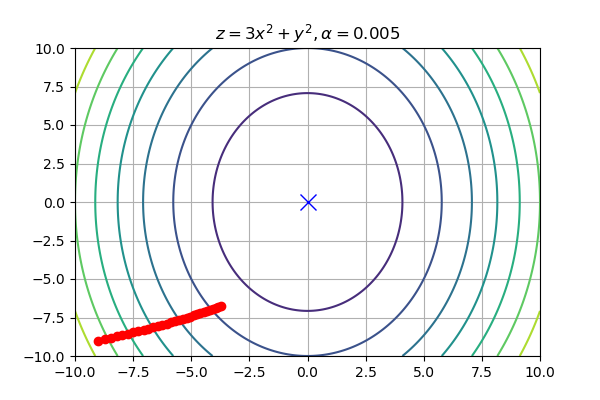

In [19]:
alpha = 0.005

gd_X, gd_Z = trace_grad_descent(z, dz, x0=np.array([-9., -9.]), alpha=alpha, n_iter=100)

gd_X = np.array(gd_X)
gd_Z = np.array(gd_Z).reshape(-1, 1)

animate_grad_descent_2d(X, Y, Z, min_point=(0, 0), gd_X=gd_X, title='$z = 3x^2 + y^2, \\alpha={}$'.format(alpha))

### 3.2. Good convergence

<IPython.core.display.Javascript object>


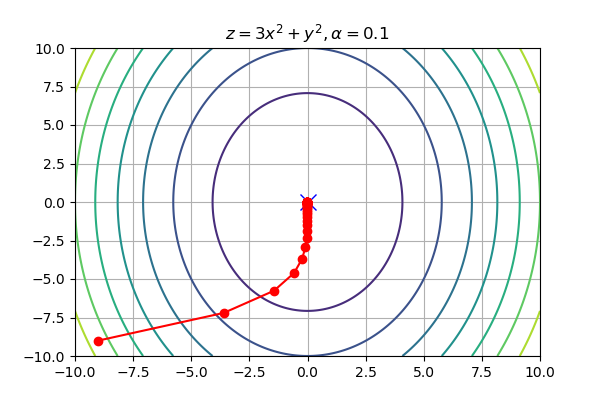

In [20]:
alpha = 0.1

gd_X, gd_Z = trace_grad_descent(z, dz, x0=np.array([-9., -9.]), alpha=alpha, n_iter=100)

gd_X = np.array(gd_X)
gd_Z = np.array(gd_Z).reshape(-1, 1)

animate_grad_descent_2d(X, Y, Z, min_point=(0, 0), gd_X=gd_X, title='$z = 3x^2 + y^2, \\alpha={}$'.format(alpha))

### 3.3. Overjumping convergence

<IPython.core.display.Javascript object>


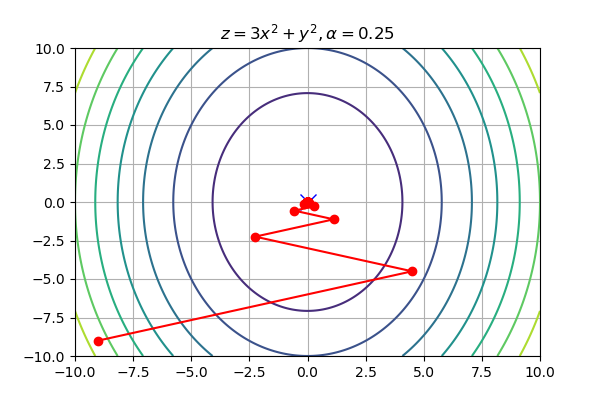

In [21]:
alpha = 0.25

gd_X, gd_Z = trace_grad_descent(z, dz, x0=np.array([-9., -9.]), alpha=alpha, n_iter=100)

gd_X = np.array(gd_X)
gd_Z = np.array(gd_Z).reshape(-1, 1)

animate_grad_descent_2d(X, Y, Z, min_point=(0, 0), gd_X=gd_X, title='$z = 3x^2 + y^2, \\alpha={}$'.format(alpha))

## 4. Advanced methods
## $z=0.1x^2 + 10y^2$

In [22]:
def z(x):
    return 0.1 * x[0] ** 2 + 10 * x[1] ** 2


def dz(x):
    dx_0 = 0.2 * x[0]
    dx_1 = 20 * x[1]
    return np.array([dx_0, dx_1])

In [23]:
x = np.linspace(start=-10, stop=10, num=200, endpoint=True)
y = np.linspace(start=-10, stop=10, num=200, endpoint=True)

X, Y = np.meshgrid(x, y)
Z = z([X, Y])

### 4.0. Gradient descent

<IPython.core.display.Javascript object>


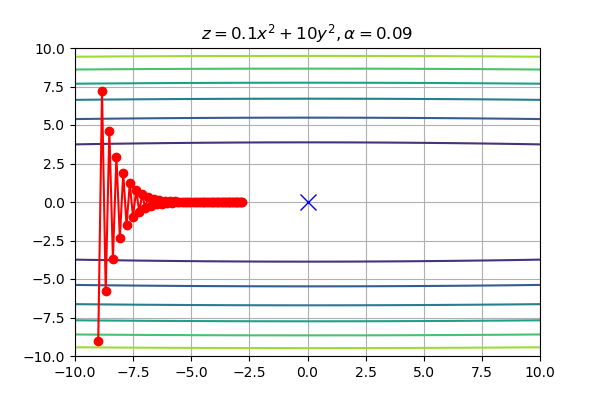

In [24]:
alpha = 0.09

gd_X, gd_Z = trace_grad_descent(z, dz, x0=np.array([-9., -9.]), alpha=alpha, n_iter=100)

gd_X = np.array(gd_X)
gd_Z = np.array(gd_Z).reshape(-1, 1)

animate_grad_descent_2d(X, Y, Z, min_point=(0, 0), gd_X=gd_X, title='$z = 0.1x^2 + 10y^2, \\alpha={}$'.format(alpha))

### 4.1. Momentum

In [25]:
def trace_momentum(f, df, x0, alpha=0.01, beta = 0.9, correct_bias=False, n_iter=100):
    x = x0
    points_X = [x]
    points_Y = [f(x)]
    
    M = np.zeros(shape=x0.shape)

    for i in range(1, n_iter + 1):
        
        M = beta * M + (1 - beta) * df(x)
        
        if correct_bias:
            x = x - alpha * M / (1 - beta ** i)
        else:
            x = x - alpha * M
        
        y = f(x)
        
        points_X.append(x)
        points_Y.append(y)

    return points_X, points_Y

<IPython.core.display.Javascript object>


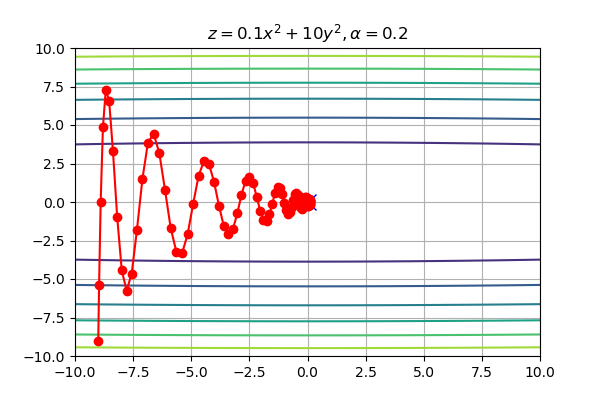

In [26]:
alpha = 0.2

gd_X, gd_Z = trace_momentum(z, dz, x0=np.array([-9., -9.]), alpha=alpha, n_iter=100)

gd_X = np.array(gd_X)
gd_Z = np.array(gd_Z).reshape(-1, 1)

animate_grad_descent_2d(X, Y, Z, min_point=(0, 0), gd_X=gd_X, title='$z = 0.1x^2 + 10y^2, \\alpha={}$'.format(alpha))

### 4.2. RMS Prop

In [27]:
def trace_rms_prop(f, df, x0, alpha=0.01, beta=0.999, epsilon=10 ** -8, n_iter=100):
    x = x0
    points_X = [x]
    points_Y = [f(x)]
    
    S = np.zeros(shape=x0.shape)

    for i in range(1, n_iter + 1):
        
        S = beta * S + (1 - beta) * df(x) ** 2
        
        x = x - alpha * df(x) / (np.sqrt(S) + epsilon)
        y = f(x)
        
        points_X.append(x)
        points_Y.append(y)

    return points_X, points_Y

<IPython.core.display.Javascript object>


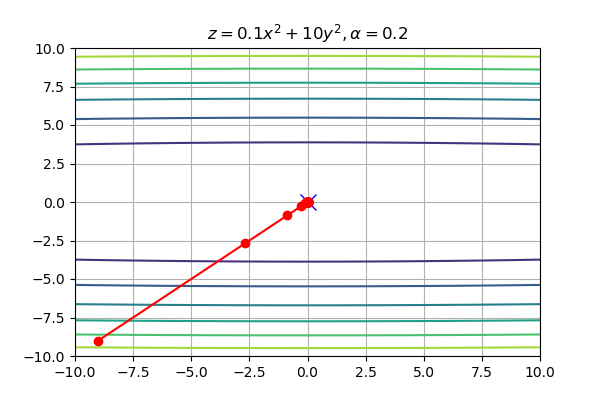

In [28]:
alpha = 0.2

gd_X, gd_Z = trace_rms_prop(z, dz, x0=np.array([-9., -9.]), alpha=alpha, n_iter=100)

gd_X = np.array(gd_X)
gd_Z = np.array(gd_Z).reshape(-1, 1)

animate_grad_descent_2d(X, Y, Z, min_point=(0, 0), gd_X=gd_X, title='$z = 0.1x^2 + 10y^2, \\alpha={}$'.format(alpha))

### 4.3. Adam

In [29]:
def trace_adam(f, df, x0, alpha=0.01, beta_1=0.9, beta_2=0.999, epsilon=10 ** -8, n_iter=100):
    x = x0
    points_X = [x]
    points_Y = [f(x)]
    
    M = np.zeros(shape=x0.shape)
    S = np.zeros(shape=x0.shape)

    for i in range(1, n_iter + 1):
        
        dx = df(x)
        
        M = beta_1 * M + (1 - beta_1) * dx
        S = beta_2 * S + (1 - beta_2) * dx ** 2
        
        mu = M / (1 - beta_1 ** i)
        su = S / (1 - beta_2 ** i)
        
        x = x - alpha * mu / (np.sqrt(su) + epsilon)
        y = f(x)
        
        points_X.append(x)
        points_Y.append(y)

    return points_X, points_Y

<IPython.core.display.Javascript object>


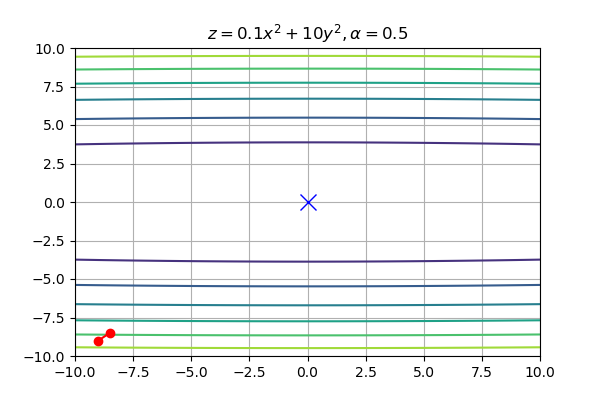

In [30]:
alpha = 0.5

gd_X, gd_Z = trace_adam(z, dz, x0=np.array([-9., -9.]), alpha=alpha, n_iter=100)

gd_X = np.array(gd_X)
gd_Z = np.array(gd_Z).reshape(-1, 1)

animate_grad_descent_2d(X, Y, Z, min_point=(0, 0), gd_X=gd_X, title='$z = 0.1x^2 + 10y^2, \\alpha={}$'.format(alpha))